In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [68]:
df=sns.load_dataset('tips')
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
#1
X=df[['total_bill','tip']].values
y=df['size'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(183, 2)
(61, 2)
(183,)
(61,)


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
baseline_rmse = []
new_rmse= []
for i in range(10):
    normalized_bill = ((df['total_bill'] - df['total_bill'].min()) /(df['total_bill'].max() - df['total_bill'].min())).values
    normalized_bill *=66
    X_numeric = df[['tip','total_bill']].values
    X_numeric = np.hstack([X_numeric, normalized_bill.reshape((-1, 1))])
    ohe = OneHotEncoder()
    X_categorical = ohe.fit_transform(df[['time','sex','day']]).toarray()
    y = df['size'].values
    
    X_num_train, X_num_test, X_cat_train, X_cat_test, y_train, y_test = \
        train_test_split(X_numeric, X_categorical, y)
    
    baseline_knn = KNeighborsRegressor(n_neighbors=34)
    baseline_knn.fit(X_num_train, y_train)
    baseline_rmse.append(np.sqrt(mean_squared_error(y_test,baseline_knn.predict(X_num_test))))
    X_train = np.hstack([X_num_train, X_cat_train])
    X_test = np.hstack([X_num_test, X_cat_test])
    
    new_knn = KNeighborsRegressor(n_neighbors=34)
    new_knn.fit(X_train, y_train)
    new_rmse.append(np.sqrt(mean_squared_error(y_test, new_knn.predict(X_test))))
    print(mean_squared_error(y_test, new_knn.predict(X_test)))

0.5391116909637529
0.663367179079925
0.5756707697543821
0.8786091099892224
0.7613023994554429
0.5275540302909978
0.6559787849566054
0.6715497192126608
0.5789040785070056
0.5506409892790288


In [80]:
X_num = df[['total_bill','tip']].values
X_cat = (df['time'] == 'Lunch').astype(int).values
print(X_num.shape,X_cat.shape)

(244, 2) (244,)


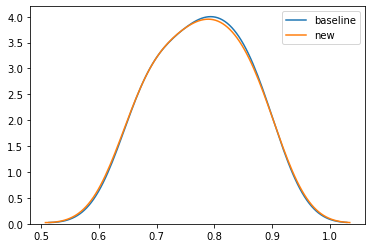

In [57]:
sns.kdeplot(baseline_rmse,label='baseline')
sns.kdeplot(new_rmse,label='new')
plt.legend()
plt.show()

In [59]:
np.hstack([X_num, X_cat.reshape((-1, 1))])

array([[16.99,  1.01,  0.  ],
       [10.34,  1.66,  0.  ],
       [21.01,  3.5 ,  0.  ],
       [23.68,  3.31,  0.  ],
       [24.59,  3.61,  0.  ],
       [25.29,  4.71,  0.  ],
       [ 8.77,  2.  ,  0.  ],
       [26.88,  3.12,  0.  ],
       [15.04,  1.96,  0.  ],
       [14.78,  3.23,  0.  ],
       [10.27,  1.71,  0.  ],
       [35.26,  5.  ,  0.  ],
       [15.42,  1.57,  0.  ],
       [18.43,  3.  ,  0.  ],
       [14.83,  3.02,  0.  ],
       [21.58,  3.92,  0.  ],
       [10.33,  1.67,  0.  ],
       [16.29,  3.71,  0.  ],
       [16.97,  3.5 ,  0.  ],
       [20.65,  3.35,  0.  ],
       [17.92,  4.08,  0.  ],
       [20.29,  2.75,  0.  ],
       [15.77,  2.23,  0.  ],
       [39.42,  7.58,  0.  ],
       [19.82,  3.18,  0.  ],
       [17.81,  2.34,  0.  ],
       [13.37,  2.  ,  0.  ],
       [12.69,  2.  ,  0.  ],
       [21.7 ,  4.3 ,  0.  ],
       [19.65,  3.  ,  0.  ],
       [ 9.55,  1.45,  0.  ],
       [18.35,  2.5 ,  0.  ],
       [15.06,  3.  ,  0.  ],
       [20

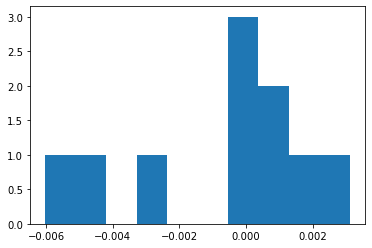

In [60]:
plt.hist(np.array(new_rmse) - np.array(baseline_rmse))
plt.show()

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
ohe = OneHotEncoder()

In [77]:
#c
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
x=df[['total_bill','tip','sex','day']]
y=df[['size']]
x_train, x_test, y_train, y_test = train_test_split(x, y)



numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['total_bill','tip']),
    ('categorical', categorical_transformer, ['sex', 'day'])
])

model_pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regressor', KNeighborsRegressor(n_neighbors=34))
])

model_pipeline.fit(x_train, y_train)
print(mean_squared_error(y_test, model_pipeline.predict(x_test)))

0.3994838050938794


In [91]:
#2
from sklearn.metrics import mean_squared_error, mean_absolute_error
new_rmse= []

new_mae=[]
for i in range(10):
    normalized_bill = ((df['total_bill'] - df['total_bill'].min()) /(df['total_bill'].max() - df['total_bill'].min())).values
    normalized_bill *=66
    X_numeric = df[['tip','total_bill']].values
    X_numeric = np.hstack([X_numeric, normalized_bill.reshape((-1, 1))])
    ohe = OneHotEncoder()
    X_categorical = ohe.fit_transform(df[['time','sex','day']]).toarray()
    y = df['size'].values
    X_num_train, X_num_test, X_cat_train, X_cat_test, y_train, y_test = \
        train_test_split(X_numeric, X_categorical, y)
    X_train = np.hstack([X_num_train, X_cat_train])
    X_test = np.hstack([X_num_test, X_cat_test])
    
    new_knn = KNeighborsRegressor(n_neighbors=34)
    new_knn.fit(X_train, y_train)
    new_rmse.append(np.sqrt(mean_squared_error(y_test, new_knn.predict(X_test))))
    new_mae.append(mean_squared_error(y_test, new_knn.predict(X_test)))
    print('MSE',mean_squared_error(y_test, new_knn.predict(X_test)),
          'MAE',mean_absolute_error(y_test, new_knn.predict(X_test)))

MSE 0.5489534290090192 MAE 0.5130183220829315
MSE 0.6636508026547168 MAE 0.5477338476374156
MSE 0.6825968574507913 MAE 0.6017357762777242
MSE 0.5282205456917579 MAE 0.523625843780135
MSE 0.6705286743434115 MAE 0.5964320154291225
MSE 0.5526121731238302 MAE 0.5834136933461909
MSE 0.4759061773214589 MAE 0.5241080038572805
MSE 0.6347070168472404 MAE 0.5935390549662487
MSE 0.584151114640649 MAE 0.5091610414657666
MSE 0.390180951840717 MAE 0.4561234329797493


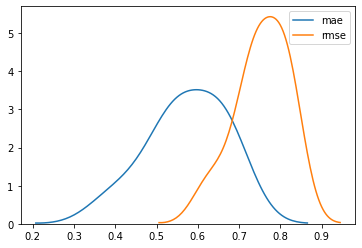

In [96]:

sns.kdeplot(new_mae,label='mae')
sns.kdeplot(new_rmse,label='rmse')
plt.legend()
plt.show()

In [99]:
#3
dx=sns.load_dataset('diamonds')
dx.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [101]:
dx.shape

(53940, 10)

In [102]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [103]:
dx.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [104]:
dx.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [105]:
dx['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

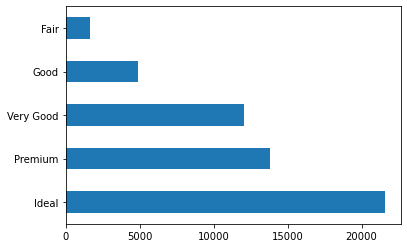

In [106]:
dx['cut'].value_counts().plot.barh()

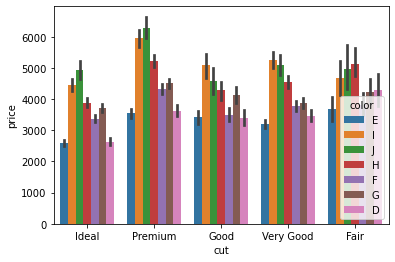

In [107]:
sns.barplot(x='cut',y='price',hue='color',data=dx)

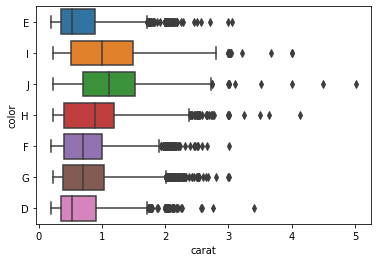

In [108]:
#outliers
sns.boxplot (x="carat",y="color",data=dx)

In [227]:
#b
X= dx.drop(["price"],axis =1)
y= dx["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [180]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['carat', 'depth']),
    ('categorical', categorical_transformer, ['cut', 'color', 'clarity'])
])

model_pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regressor', KNeighborsRegressor(n_neighbors=11))
])

model_pipeline.fit(X_train, y_train)
print(mean_squared_error(y_test, model_pipeline.predict(X_test)))
print(r2_score(y_test, model_pipeline.predict(X_test)))


775793.2236436566
0.9512154276294256


In [182]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['carat', 'depth']),
    ('categorical', categorical_transformer, ['cut', 'color', 'clarity'])
])

model_pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regressor', DecisionTreeRegressor(max_depth=5))
])
model_pipeline.fit(X_train, y_train)
print(mean_squared_error(y_test, model_pipeline.predict(X_test)))
print(r2_score(y_test, model_pipeline.predict(X_test)))

1388810.5937218051
0.9126667662805439


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.41019495, 0.51019495, 0.61019495, 0.71019495, 0.81019495,
        0.91019495, 1.01019495, 1.11019495, 1.21019495, 1.31019495,
        1.41019495]),
 <a list of 10 Patch objects>)

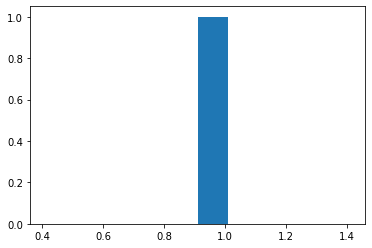

In [241]:
plt.hist(r2_score(y_test, model_pipeline.predict(X_test)))

In [128]:
#Titanic
ds=sns.load_dataset('Titanic')
ds.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [233]:
ds.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [232]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(ds[['age']])


array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [24.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [24.  ],
       [31.  ],
       [24.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [24.  ],
       [19.  ],
       [24.  ],
       [24.  ],
       [40.  ],
       [24.  ],
       [24.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [24.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [24.  ],
       [ 3.  ],
       [19.  ],
       [24.  ],
       [24.  ],
       [24.  ],
       [24.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [24.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [197]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(ds[['embarked']])

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

In [141]:
ds['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [226]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(ds[['deck']])
ds.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
X = ds[['age', 'fare', 'sex', 'pclass', 'embark_town', 'alone']]
y = ds[['survived']]
class_rep=[]
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    numeric_features = ['age', 'fare']
    categorical_features = ['sex', 'pclass', 'embark_town', 'alone']

    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())
            ]), numeric_features),
            ('categorical', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder())
            ]), categorical_features)
        ])),
        ('classifier', DecisionTreeClassifier(max_depth=5))
    ])
    pipe.fit(X_train, y_train);
    class_rep.append(classification_report(y_test,pipe.predict(X_test)))
    print(classification_report(y_test, pipe.predict(X_test)))
    
 

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       135
           1       0.86      0.70      0.78        88

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       146
           1       0.74      0.68      0.71        77

    accuracy                           0.81       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.81      0.80       223

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       149
           1       0.75      0.61      0.67        74

    accuracy                           0.80       223
   macro avg       0.79      0.75      0.77       223
weighted avg       0.80      0.80      0.80       223

              preci

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
X = ds[['age', 'fare', 'sex', 'pclass', 'embark_town', 'alone']]
y = ds[['survived']]
class_rep=[]
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    numeric_features = ['age', 'fare']
    categorical_features = ['sex', 'pclass', 'embark_town', 'alone']

    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())
            ]), numeric_features),
            ('categorical', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder())
            ]), categorical_features)
        ])),
        ('classifier', KNeighborsClassifier(n_neighbors=11))
    ])
    pipe.fit(X_train, y_train);
    class_rep.append(classification_report(y_test,pipe.predict(X_test)))
    print(classification_report(y_test, pipe.predict(X_test)))
    

C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


              precision    recall  f1-score   support

           0       0.78      0.89      0.83       131
           1       0.80      0.65      0.72        92

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.78       223

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       132
           1       0.82      0.62      0.70        91

    accuracy                           0.79       223
   macro avg       0.80      0.76      0.77       223
weighted avg       0.79      0.79      0.78       223

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       139
           1       0.67      0.62      0.64        84

    accuracy                           0.74       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223



C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


              precision    recall  f1-score   support

           0       0.83      0.78      0.80       139
           1       0.67      0.74      0.70        84

    accuracy                           0.76       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.76      0.76       223

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       137
           1       0.79      0.71      0.75        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.82      0.81       223

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       147
           1       0.76      0.59      0.67        76

    accuracy                           0.80       223
   macro avg       0.79      0.75      0.76       223
weighted avg       0.79      0.80      0.79       223



C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


              precision    recall  f1-score   support

           0       0.77      0.86      0.82       138
           1       0.72      0.59      0.65        85

    accuracy                           0.76       223
   macro avg       0.75      0.73      0.73       223
weighted avg       0.75      0.76      0.75       223

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       130
           1       0.84      0.56      0.67        93

    accuracy                           0.77       223
   macro avg       0.79      0.74      0.75       223
weighted avg       0.78      0.77      0.76       223

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       129
           1       0.78      0.55      0.65        94

    accuracy                           0.74       223
   macro avg       0.75      0.72      0.72       223
weighted avg       0.75      0.74      0.74       223

              preci

C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
